<a href="https://colab.research.google.com/github/chocopie0301/CS114.M11.KHCL/blob/main/BTTH/CS114_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 1: LINEAR REGRESSION**


---


# Nhóm TTP
Thành viên:


*   Nguyễn Thành Trung - 19522432
*   Trần Hồ Thiên Phước - 19522057





---




In [2]:
%%capture
!wget https://cs.uit.edu.vn/data2.txt
!wget https://cs.uit.edu.vn/data3.txt
!wget https://cs.uit.edu.vn/data4.txt

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

# Linear Regression

In [12]:
train = pd.read_csv('data2.txt', header=None).to_numpy()
test1 = pd.read_csv('data3.txt', header=None).to_numpy()
test2 = pd.read_csv('data4.txt', header=None).to_numpy()

# Loại bỏ các giá trị nhỏ hơn 0.5*1e7 để giảm bớt những giá trị hội tụ trong bộ train.
train = train[train[:, 0] > 0.5*1e7] 

# Chuẩn hóa dữ liệu
scaler = StandardScaler()

X_train, y_train = scaler.fit_transform(train[:, :1]), train[:, 1:]
X_test1, y_test1 = scaler.transform(test1[:, :1]), test1[:, 1:]
X_test2, y_test2 = scaler.transform(test2[:, :1]), test2[:, 1:]


In [13]:
train.shape, test1.shape

((35633, 2), (10590, 2))

In [8]:
#train
#test1
#test2

array([[6.083695e+06, 5.218420e-01],
       [5.839301e+06, 4.604800e-01],
       [6.343427e+06, 5.279770e-01],
       ...,
       [5.471895e+06, 4.299550e-01],
       [9.837364e+06, 8.013940e-01],
       [9.466593e+06, 7.764070e-01]])

## Trực quang hóa dữ liệu

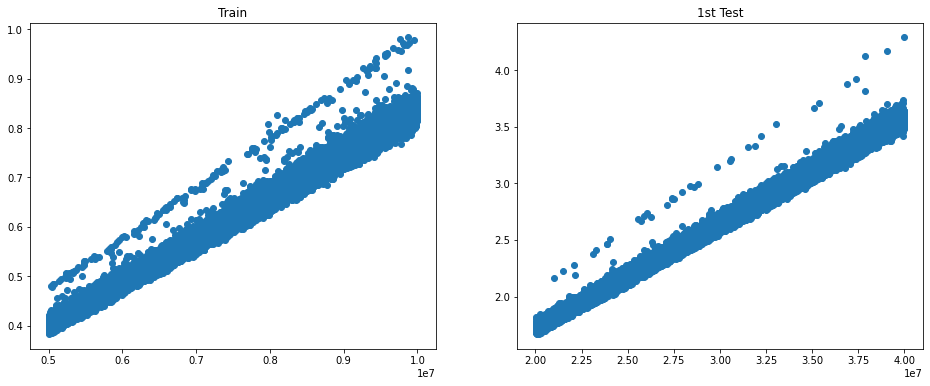

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].scatter(train[:, :1], train[:, 1:])
ax[0].set_title('Train')
ax[1].scatter(test1[:, :1], test1[:, 1:])
ax[1].set_title('1st Test')
plt.show()

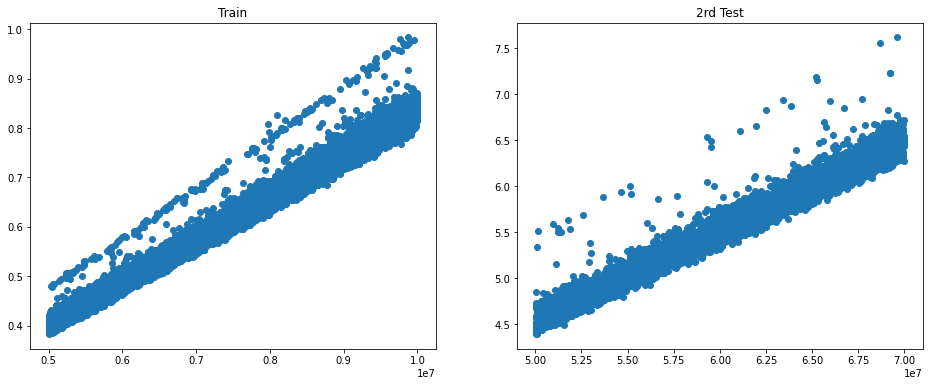

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].scatter(train[:, :1], train[:, 1:])
ax[0].set_title('Train')
ax[1].scatter(test2[:, :1], test2[:, 1:])
ax[1].set_title('2rd Test')
plt.show()

## Huấn luyện mô hình

In [ ]:
lg = LinearRegression()

lg.fit(X_train, y_train)

LinearRegression()

## Chạy thực nghiệm trên bộ Test

In [ ]:
train_pred = lg.predict(X_train)
train_r2s = r2_score(y_train, train_pred)

test_pred_1 = lg.predict(X_test1)
test_r2s_1 = r2_score(y_test1, test_pred_1)

test_pred_2 = lg.predict(X_test2)
test_r2s_2 = r2_score(y_test2, test_pred_2)

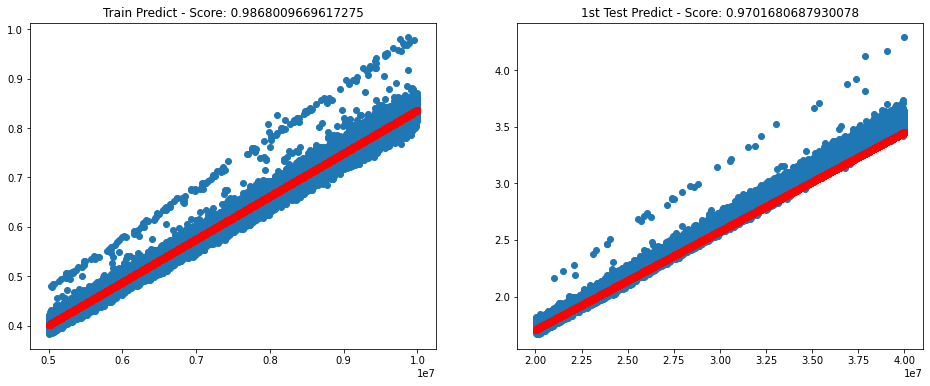

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].scatter(scaler.inverse_transform(X_train), y_train) # Hoàn tác chia tỷ lệ của X_train theo feature_range.
ax[0].scatter(scaler.inverse_transform(X_train), train_pred, c='r') 
ax[0].set_title('Train Predict - Score: {}'.format(train_r2s))

ax[1].scatter(scaler.inverse_transform(X_test1), y_test1) # Hoàn tác chia tỷ lệ của X_test theo feature_range.
ax[1].scatter(scaler.inverse_transform(X_test1), test_pred_1, c='r')

ax[1].set_title('1st Test Predict - Score: {}'.format(test_r2s_1))
plt.show()


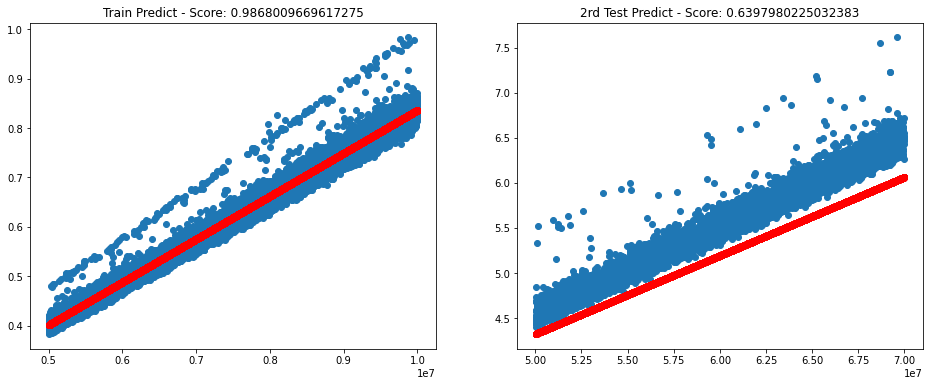

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].scatter(scaler.inverse_transform(X_train), y_train) # Hoàn tác chia tỷ lệ của X_train theo feature_range.
ax[0].scatter(scaler.inverse_transform(X_train), train_pred, c='r')
ax[0].set_title('Train Predict - Score: {}'.format(train_r2s))

ax[1].scatter(scaler.inverse_transform(X_test2), y_test2) # Hoàn tác chia tỷ lệ của X_test2 theo feature_range.
ax[1].scatter(scaler.inverse_transform(X_test2), test_pred_2, c='r')
ax[1].set_title('2rd Test Predict - Score: {}'.format(test_r2s_2))
plt.show()


Nhóm em sử dụng thư viện Scikit Learn cho thuật toán Linear Regression với dữ liệu train data2.txt, 2 dữ liệu test là data3.txt và data4.txt cho kết quả dự đoán lần lượt là ~97% và ~63.98%. Qua kết quả đó và hình ảnh trực quang dữ liệu, nhóm em thấy bộ test data4.txt cho kết quả không tốt do giá trị test ở data4.txt phân bổ rộng hơn trên biểu đồ so với data3.txt.

## Polynomial Regression

In [ ]:
def polynominal_features(x):
  return np.c_[x[:, :1], np.log(x[:, :1]), x[:, :1], x[:, :1]**0.5]

In [ ]:
train = pd.read_csv('data2.txt', header=None).to_numpy()
test1 = pd.read_csv('data3.txt', header=None).to_numpy()
test2 = pd.read_csv('data4.txt', header=None).to_numpy()

train = train[train[:, 0] > 0.4*1e7]

X_train = polynominal_features(train)
X_test1 = polynominal_features(test1)
X_test2 = polynominal_features(test2)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()

X_train, y_train = scaler.fit_transform(X_train), train[:, 1:]
X_test1, y_test1 = scaler.transform(X_test1), test1[:, 1:]
X_test2, y_test2 = scaler.transform(X_test2), test2[:, 1:]

In [ ]:
lg = LinearRegression()

lg.fit(X_train, y_train)

LinearRegression()

In [ ]:
train_pred_pl = lg.predict(X_train)
train_r2s_pl = r2_score(y_train, train_pred_pl)

test_pred_pl1 = lg.predict(X_test1)
test_r2s_pl1 = r2_score(y_test1, test_pred_pl1)

test_pred_pl2 = lg.predict(X_test2)
test_r2s_pl2 = r2_score(y_test2, test_pred_pl2)

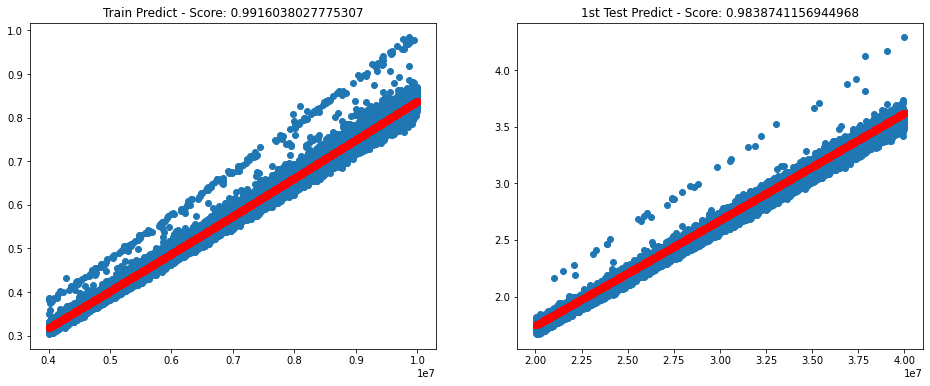

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].scatter(scaler.inverse_transform(X_train)[:, 0], y_train) # Hoàn tác chia tỷ lệ của X_train theo feature_range.
ax[0].scatter(scaler.inverse_transform(X_train)[:, 0], train_pred_pl, c='r')
ax[0].set_title('Train Predict - Score: {}'.format(train_r2s_pl))

ax[1].scatter(scaler.inverse_transform(X_test1)[:, 0], y_test1) # Hoàn tác chia tỷ lệ của X_train theo feature_range.
ax[1].scatter(scaler.inverse_transform(X_test1)[:, 0], test_pred_pl1, c='r')

ax[1].set_title('1st Test Predict - Score: {}'.format(test_r2s_pl1))
plt.show()

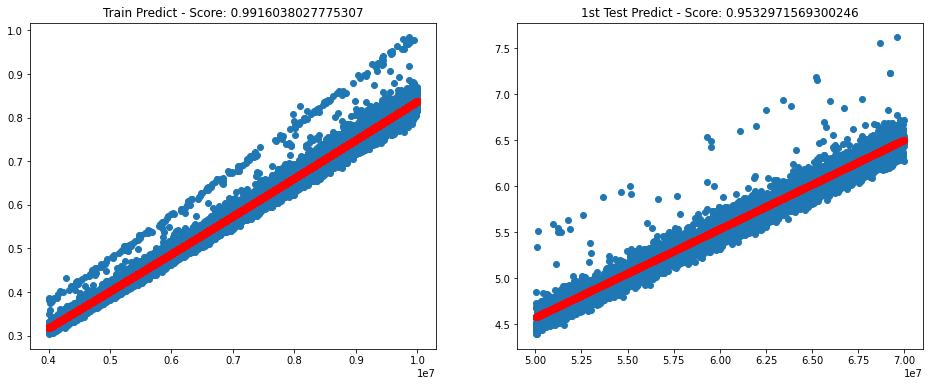

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].scatter(scaler.inverse_transform(X_train)[:, 0], y_train)
ax[0].scatter(scaler.inverse_transform(X_train)[:, 0], train_pred_pl, c='r')
ax[0].set_title('Train Predict - Score: {}'.format(train_r2s_pl))

ax[1].scatter(scaler.inverse_transform(X_test2)[:, 0], y_test2)
ax[1].scatter(scaler.inverse_transform(X_test2)[:, 0], test_pred_pl2, c='r')

ax[1].set_title('1st Test Predict - Score: {}'.format(test_r2s_pl2))
plt.show()

Sau khi sử dụng Polynomial Regression cho dữ liệu đầu vào y = 𝞱_1 * sqrt(x) + 𝞱_2 * log(x) + 𝞱_3 * x + 𝞱_0 và sử dụng thuật toán Linear Regression đã cho ra 2 kết quả tốt hơn ở cả 2 tập test data3.txt và data4.txt, cụ thể là ~0.98 và ~0.95.